<a href="https://colab.research.google.com/github/KaurGurarpit/APMC_dataAnalysis_Maharashtra/blob/master/SocialCops_APMC_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Overview**

**Challenge 1: Agriculture Commodities, Prices & Seasons**

The main objective of the following analysis is to understand the key  trends in **APMC** (**Agricultural produce market committee**)/mandi price & quantity arrival data for different commodities in Maharashtra. The folowing requirements were taken into consideration while conducting the analysis:



1. To understand price fluctuations accounting the seasonal effect.

> - Detect seasonality type (multiplicative or additive) for each cluster of APMC and commodities.

> - De-seasonalise prices for each commodity and APMC according to the detected seasonality type.

2. Compare prices in APMC/Mandi with MSP(Minimum Support Price)- raw and deseasonalised.

3. Flag set of APMC/mandis and commodities with highest price fluctuation across different commodities in each relevant season, and year.


**Variable Description**


*  msprice- Minimum Support Price
*  arrivals_in_qtl- Quantity arrival in market (in quintal)
*  min_price- Minimum price charged per quintal
*  max_price- Maximum price charged per quintal
*  modal_price- Mode (Average) price charged per quintal


## Import Libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [0]:
from google.colab import files

## Loading the datasets

Dataset_A = **CMO_MSP_Mandi.csv**

Dataset_B =** Monthly_data_cmo.csv**

In [0]:
dataset1=files.upload()

Saving CMO_MSP_Mandi.csv to CMO_MSP_Mandi.csv


In [0]:
dataset2=files.upload()

Saving Monthly_data_cmo.csv to Monthly_data_cmo.csv


In [0]:
import io
dataset_A = pd.read_csv(io.BytesIO(dataset1['CMO_MSP_Mandi.csv']))

dataset_B = pd.read_csv(io.BytesIO(dataset2['Monthly_data_cmo.csv']))

## Understanding the data

In [0]:
dataset_A.head()

,commodity,year,Type,msprice,msp_filter
0,PADDY-UNHUSKED,2012,Kharif Crops,1250.0,1
1,RICE(PADDY-HUS),2012,Kharif Crops,1280.0,1
2,Jowar_Hybrid,2012,Kharif Crops,1500.0,1
3,SORGUM(JAWAR),2012,Kharif Crops,1520.0,1
4,BAJRI,2012,Kharif Crops,1175.0,1


In [0]:
dataset_B.head()

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name
0,Ahmednagar,Bajri,2015,April,79,1406,1538,1463,2015-04,Ahmadnagar,Maharashtra
1,Ahmednagar,Bajri,2016,April,106,1788,1925,1875,2016-04,Ahmadnagar,Maharashtra
2,Ahmednagar,Wheat(Husked),2015,April,1253,1572,1890,1731,2015-04,Ahmadnagar,Maharashtra
3,Ahmednagar,Wheat(Husked),2016,April,387,1750,2220,1999,2016-04,Ahmadnagar,Maharashtra
4,Ahmednagar,Sorgum(Jawar),2015,April,3825,1600,2200,1900,2015-04,Ahmadnagar,Maharashtra


In [0]:
dataset_A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 5 columns):
commodity     155 non-null object
year          155 non-null int64
Type          155 non-null object
msprice       145 non-null float64
msp_filter    155 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 6.1+ KB


From the aboveinformation we find out that dataset_A i.e CMO_MSP_Mandi data has a parameter **msprice which has missing data points **that will have to be dealt with while cleaning the data.

In [0]:
dataset_B.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62429 entries, 0 to 62428
Data columns (total 11 columns):
APMC               62429 non-null object
Commodity          62429 non-null object
Year               62429 non-null int64
Month              62429 non-null object
arrivals_in_qtl    62429 non-null int64
min_price          62429 non-null int64
max_price          62429 non-null int64
modal_price        62429 non-null int64
date               62429 non-null object
district_name      62429 non-null object
state_name         62429 non-null object
dtypes: int64(5), object(6)
memory usage: 5.2+ MB


## Standardise Variables

In [0]:
dataset_B.date=pd.to_datetime(dataset_B.date)

In [0]:
dataset_B=dataset_B[dataset_B["modal_price"]!=0]

# Data Cleaning

After analysing the above data we found out that there are certain untidy elements in our datasets that might create ambuiguity and erroneous data analysis result. In this step we will be on the look out for all such outliers and correct them. We rename the column names by converting them in lowercase and removing any whitespaces , if any.

In [0]:
dataset_A.columns=['commodity','year','type','msprice','msp_filter']


In [0]:
dataset_B.columns=['APMC','commodity','year','month','arrivals_in_qtl','min_price','max_price','modal_price','date','district_name','state_name']

In [0]:
dataset_A.commodity = dataset_A.commodity.apply(lambda x: x.lower())

In [0]:
dataset_B.commodity = dataset_B.commodity.apply(lambda x: x.lower())

In [0]:
dataset_B.tail()

,APMC,commodity,year,month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name
62424,Shrigonda,gram,2016,November,586,5700,6367,6200,2016-11-01,Ahmadnagar,Maharashtra
62425,Shrigonda,green gram,2016,November,2,5000,5000,5000,2016-11-01,Ahmadnagar,Maharashtra
62426,Shrigonda,black gram,2016,November,46,4700,6933,6400,2016-11-01,Ahmadnagar,Maharashtra
62427,Shrigonda,soybean,2016,November,166,2583,2708,2633,2016-11-01,Ahmadnagar,Maharashtra
62428,Shrigonda,sunflower,2016,November,74,2933,3200,3067,2016-11-01,Ahmadnagar,Maharashtra


## Removing Punctuation & Trailing Whitespaces

In [0]:
import string
exclude=set(string.punctuation)
def remove_punctuation(x):
    x=''.join(ch for ch in x if ch not in exclude)
    return x
dataset_A.commodity=dataset_A.commodity.apply(remove_punctuation)  
dataset_B.commodity=dataset_B.commodity.apply(remove_punctuation)
    

In [0]:
dataset_B.head()

,APMC,commodity,year,month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name
0,Ahmednagar,bajri,2015,April,79,1406,1538,1463,2015-04-01,Ahmadnagar,Maharashtra
1,Ahmednagar,bajri,2016,April,106,1788,1925,1875,2016-04-01,Ahmadnagar,Maharashtra
2,Ahmednagar,wheathusked,2015,April,1253,1572,1890,1731,2015-04-01,Ahmadnagar,Maharashtra
3,Ahmednagar,wheathusked,2016,April,387,1750,2220,1999,2016-04-01,Ahmadnagar,Maharashtra
4,Ahmednagar,sorgumjawar,2015,April,3825,1600,2200,1900,2015-04-01,Ahmadnagar,Maharashtra


In [0]:
dataset_A.head()

,commodity,year,type,msprice,msp_filter
0,paddyunhusked,2012,Kharif Crops,1250.0,1
1,ricepaddyhus,2012,Kharif Crops,1280.0,1
2,jowarhybrid,2012,Kharif Crops,1500.0,1
3,sorgumjawar,2012,Kharif Crops,1520.0,1
4,bajri,2012,Kharif Crops,1175.0,1


In [0]:
dataset_A.commodity.str.strip(to_strip=None)

In [0]:
dataset_B.commodity.str.strip(to_strip=None)

# **Exploratory Data Analysis**

We will follow the follwing steps to perform **EDA**:

1. Read and examine the  dataset and classifying variables by their type: quantitative vs. categorical.

2. Performing univariate or bivariate analysis and derive meaningful insights about the dataset.

3. Identifying and treating missing values and eliminating dataset outliers.

4. Build a correlation matrix to identify relevant variables

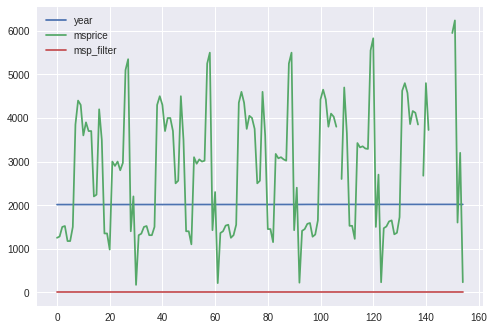

In [0]:
dataset_A.plot()

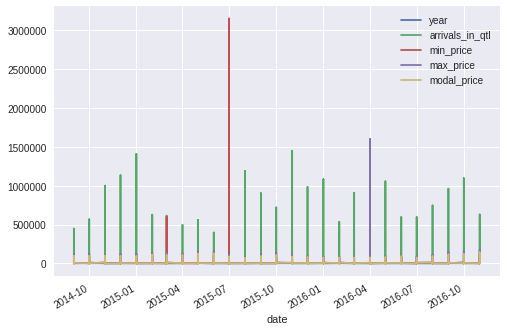

In [0]:
dataset_B.set_index('date',inplace=True)
dataset_B.plot()

Text(0.5, 1.0, 'Frequency Distribution of Crop Type')

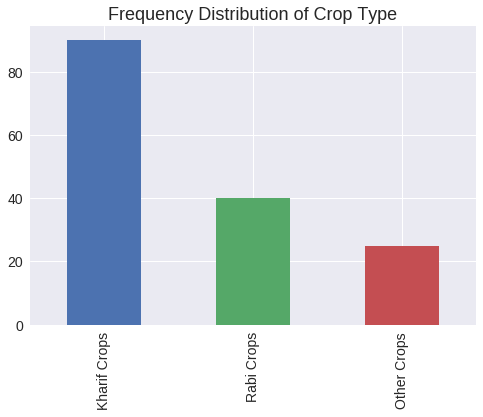

In [0]:
dataset_A['type'].value_counts().plot.bar(title="Frequency Distribution of Crop Type",fontsize=14)
plt.title("Frequency Distribution of Crop Type",fontsize=18)

Text(0.5, 1.0, 'Frequency Distribution of Commodity Type')

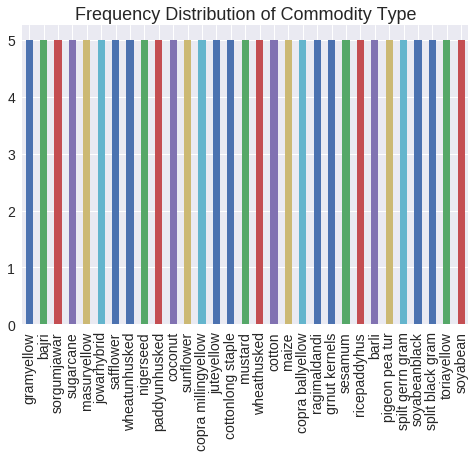

In [0]:
dataset_A['commodity'].value_counts().plot.bar(title="Frequency Distribution of Commodity Type",fontsize=14)
plt.title("Frequency Distribution of Commodity Type",fontsize=18)

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


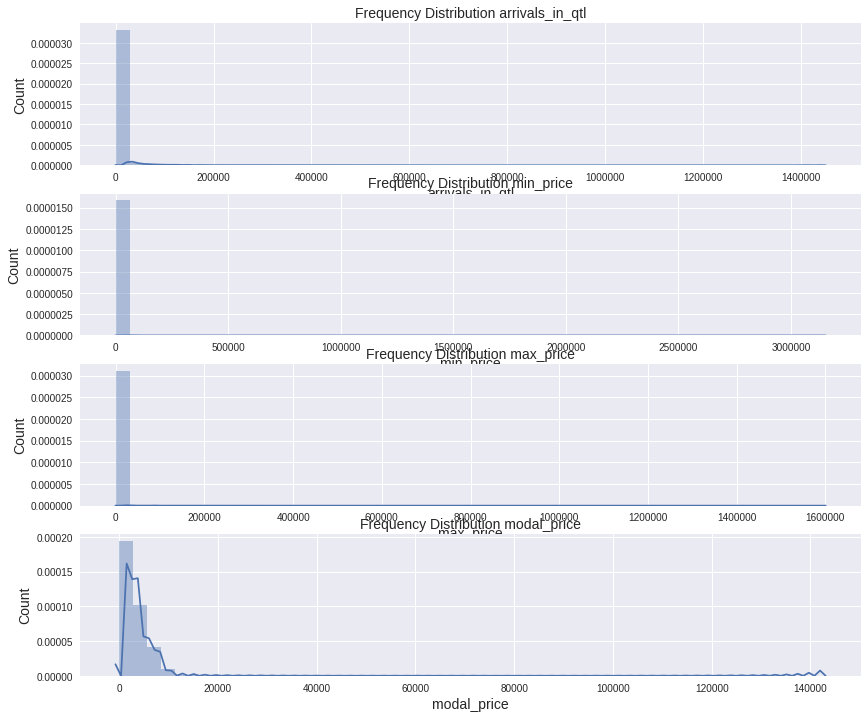

In [0]:
col_names = ['arrivals_in_qtl', 'min_price', 'max_price',
       'modal_price']

fig, ax = plt.subplots(len(col_names), figsize=(14,12))

for i, col_val in enumerate(col_names):
    sns.distplot(dataset_B[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Frequency Distribution '+col_val, fontsize=14)
    ax[i].set_xlabel(col_val, fontsize=14)
    ax[i].set_ylabel('Count', fontsize=14)
  

## Handling missing values

Having missing values in a dataset can cause errors in the results .The simplest way to deal with missing values would be to remove rows containing missing values. However, removing rows may not always prove fruitful while dealing with datasets which may require the information. Hence replacement of missing values can also be considered as an option.

In [0]:
dataset_A.isnull().sum()

commodity      0
year           0
type           0
msprice       10
msp_filter     0
dtype: int64

In [0]:
dataset_B.isnull().sum()

APMC               0
commodity          0
year               0
month              0
arrivals_in_qtl    0
min_price          0
max_price          0
modal_price        0
district_name      0
state_name         0
dtype: int64

Here , we see have 10 missing values in dataset A .We will be replacing the missing values in the dataset and not removing their rows . There are many options we could consider when replacing a missing value, for example:

1. A constant value that has meaning within the domain, such as 0, distinct from all other values.
2. A value from another randomly selected record.
3. A mean, median or mode value for the column.
4. A value estimated by another analysed model.

We will replace missing values with the mean value for that particular column . Here the column under consideration is in dataset_A  ie.** 'msprice'**.

In [0]:
dataset_A.fillna(dataset_A['msprice'].mean(), inplace=True)
# count the number of NaN values in each column
print(dataset_A.isnull().sum())

commodity     0
year          0
type          0
msprice       0
msp_filter    0
dtype: int64


## **Outlier Detection Analysis**

An outlier might indicate a mistake in the data   in which case it should be corrected or removed from the data before calculating summary statistics .
We will use **box plots** for outlier detection of our dataset . 
The interquartile range (IQR), which is the range covered by the middle 50% of the data.
IQR = Q3 - Q1, the difference between the third and first quartiles. The first quartile (Q1) is the value such that one quarter (25%) of the data points fall below it, or the median of the bottom half of the data. The third quartile is the value such that three quarters (75%) of the data points fall below it, or the median of the top half of the data.
The IQR can be used to detect outliers using the 1.5(IQR) criteria. Outliers are observations that fall below Q1 - 1.5(IQR) or above Q3 + 1.5(IQR).

### Outlier Detection in arrivals_in_qtl  

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


Text(0.5, 1.0, 'Boxplot for arrivals_in_qtl')

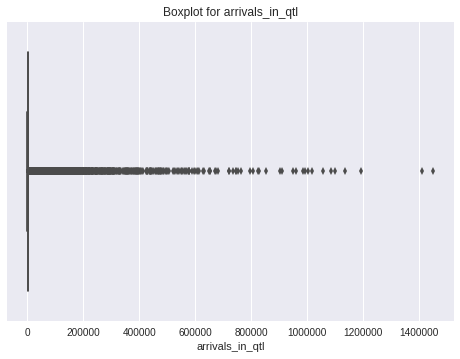

In [0]:
ax=sns.boxplot(x=dataset_B['arrivals_in_qtl'])
ax.set_title('Boxplot for arrivals_in_qtl',fontsize=12)
   
  

  


### Outlier Detection in min_price

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


Text(0.5, 1.0, 'Boxplot For minimum price')

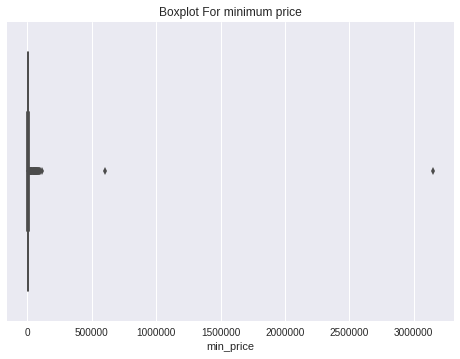

In [0]:
ax=sns.boxplot(x=dataset_B['min_price'])
ax.set_title('Boxplot For minimum price')

### Outlier Detection in max_price

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


Text(0.5, 1.0, 'Boxplot For maximum price')

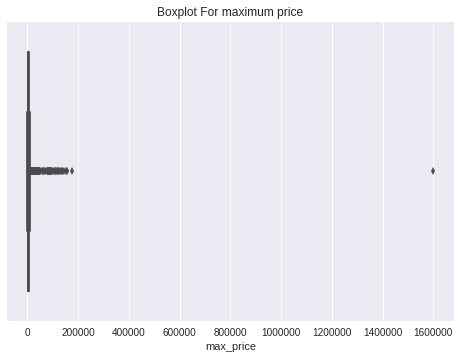

In [0]:
ax=sns.boxplot(x=dataset_B['max_price'])
ax.set_title('Boxplot For maximum price')

### Outlier Detection in modal_price

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


Text(0.5, 1.0, 'Boxplot For modal price')

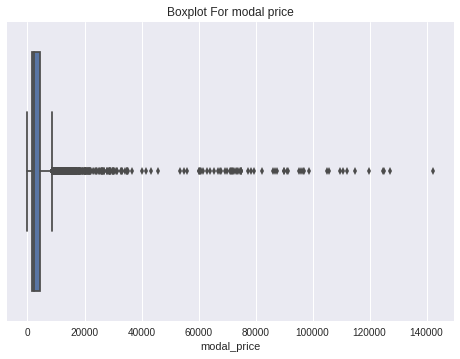

In [0]:
ax=sns.boxplot(x=dataset_B['modal_price'])
ax.set_title('Boxplot For modal price')

## Percentage based removal of above parameters

We will segregate the outliers based on a fixed percentile values. The values marked with a dot below in the x-axis of the graph are the ones that are removed from the column based on the set threshold percentile (95 in our case) and they are also the default value when it comes to percentile-based outlier removal.

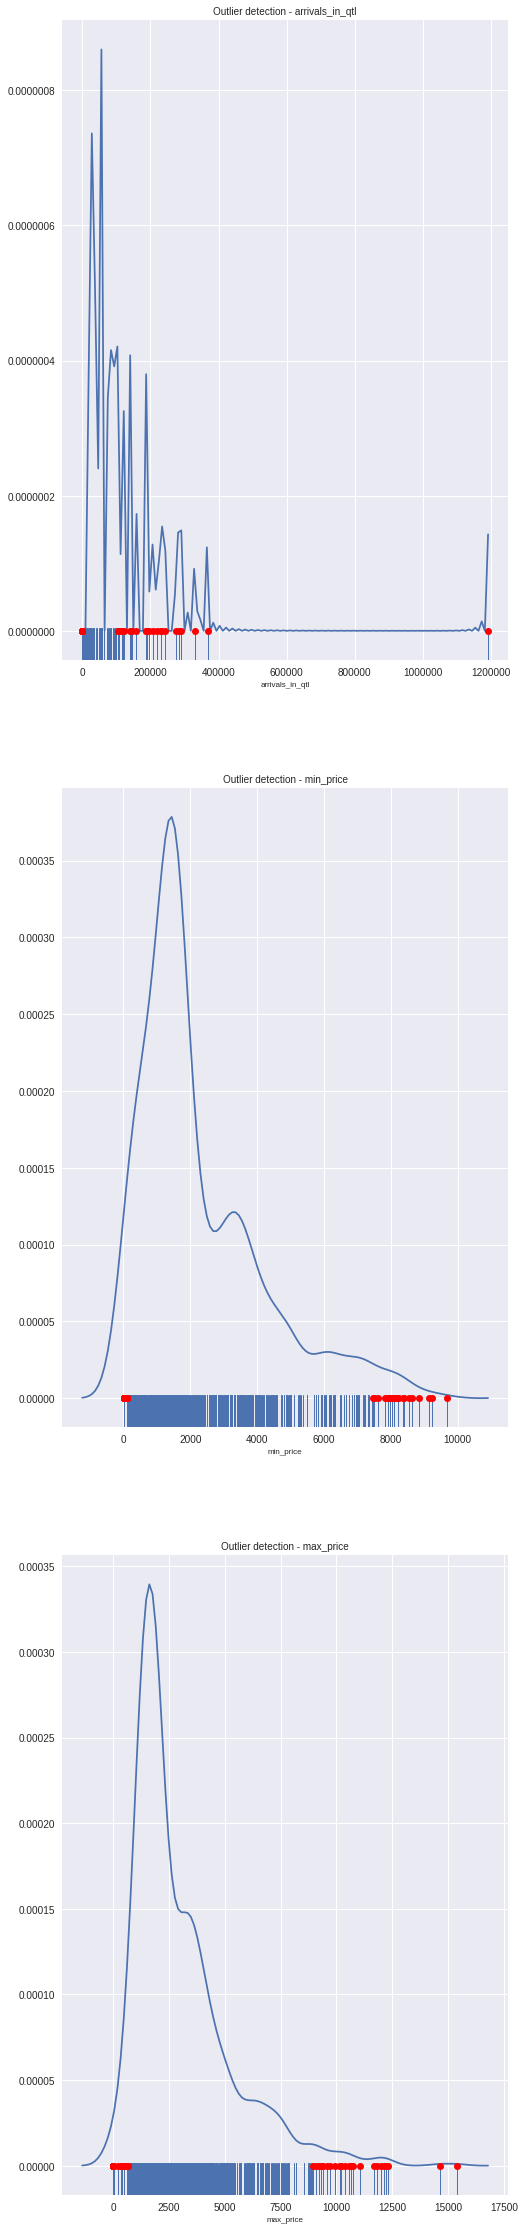

In [0]:
def percentile_based_outlier(data, threshold=95):
    diff = (100 - threshold) / 2
    minval, maxval = np.percentile(data, [diff, 100 - diff])
    return (data < minval) | (data > maxval)

col_names = ['arrivals_in_qtl','min_price', 'max_price']

fig, ax = plt.subplots(len(col_names), figsize=(8,40))

for i, col_val in enumerate(col_names):
    x = dataset_B[col_val][:1000]
    sns.distplot(x, ax=ax[i], rug=True, hist=False)
    outliers = x[percentile_based_outlier(x)]
    ax[i].plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    ax[i].set_title('Outlier detection - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

## Categorical distribution plot of type of commodity

In [0]:
import matplotlib.patches as mpatches
def Type_Out(dataset_A):
    types=list(dataset_A["type"].unique())
    for typ in types:
        data_temp=dataset_A[dataset_A["type"]==typ]
        actual=len(data_temp)
        q1 = data_temp["msprice"].quantile(0.25)
        q3 = data_temp["msprice"].quantile(0.75)
        iqr = q3-q1
        lower  = q1-1.5*iqr
        upper = q3+1.5*iqr
        data_filter=data_temp[(data_temp["msprice"] > lower) & (data_temp["msprice"] < upper)]
        filtered=len(data_filter)
        if actual!=filtered:
            print(typ)
        else:
            print("No outlier found in ",typ)
Type_Out(dataset_A)    

No outlier found in  Kharif Crops
No outlier found in  Rabi Crops
No outlier found in  Other Crops


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


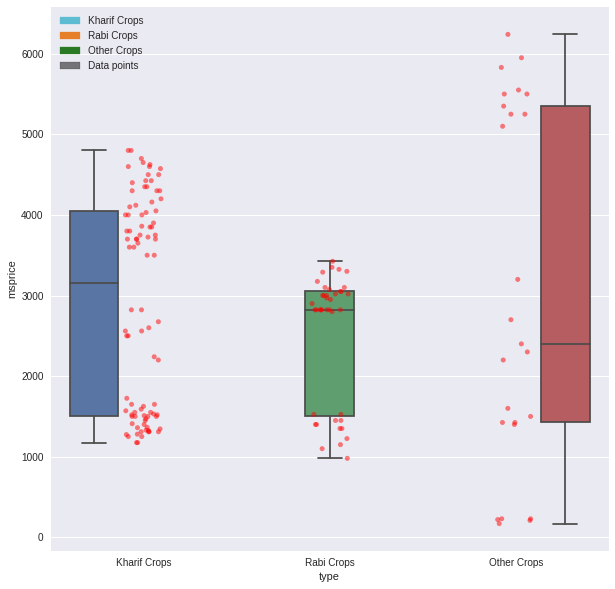

In [0]:
plt.figure(figsize=(10,10))
sns.boxplot(x="type", y="msprice",hue='type',data=dataset_A)
sns.stripplot(y='msprice', x='type',data=dataset_A,jitter=True,marker='o',alpha=0.5,color='red')
p1 = mpatches.Patch(color= '#5DBCD2', label='Kharif Crops')
p2 = mpatches.Patch(color='#E58028', label='Rabi Crops')
p3 = mpatches.Patch(color='#297925', label='Other Crops')
p4= mpatches.Patch(color='black', label='Data points',alpha=0.5)
plt.legend(handles=[p1,p2,p3,p4])
plt.show()

## Finding outliers in commodity column of CMO_MSP_Mandi data 

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


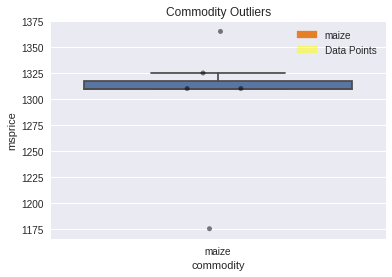

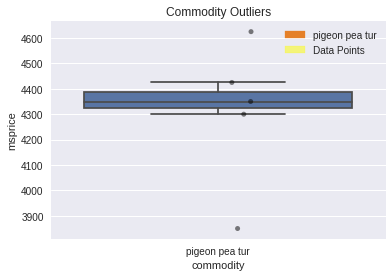

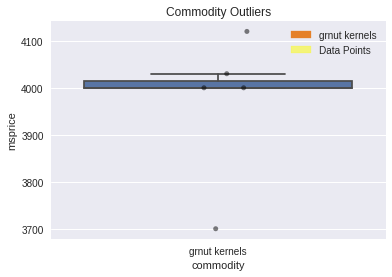

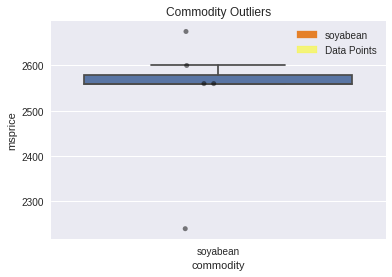

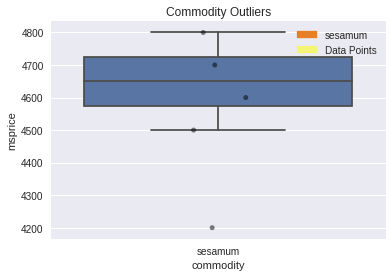

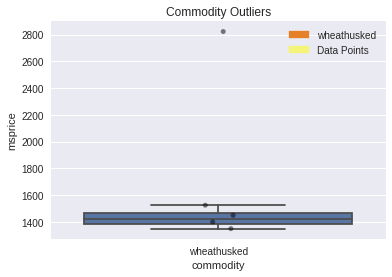

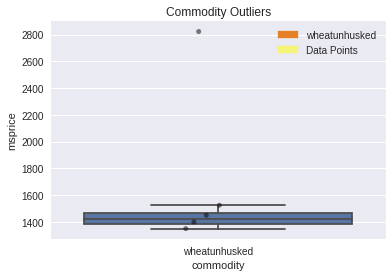

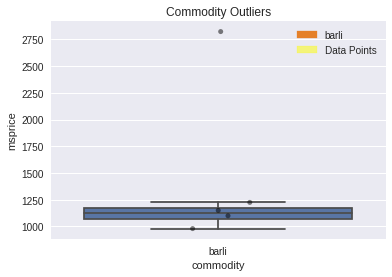

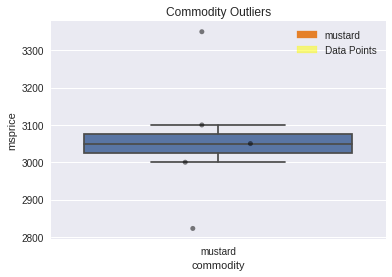

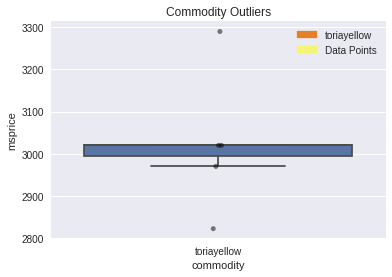

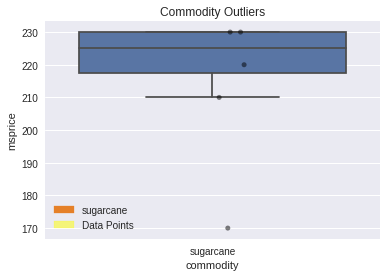

In [0]:
# Commodity price outliers
def Com_Out(dataset_A):  
    commodities=list(dataset_A["commodity"].unique())
    flag=0
    for commodity in commodities:
        data_temp=dataset_A[dataset_A["commodity"]==commodity]
        actual=len(data_temp)
        if actual>1:
            q1 = data_temp["msprice"].quantile(0.25)
            q3 = data_temp["msprice"].quantile(0.75)
            iqr = q3-q1 
            lower  = q1-1.5*iqr
            upper = q3+1.5*iqr
            data_filter=data_temp[(data_temp["msprice"] > lower) & (data_temp["msprice"] < upper)]
            filtered=len(data_filter)
            if actual!=filtered:
                flag=1
                plt.figure(figsize=(6,4))
                plt.title("Commodity Outliers")
                sns.boxplot(x="commodity", y="msprice",data=data_filter) 
                sns.stripplot(x="commodity", y="msprice",data=data_temp,jitter=True,marker='o',alpha=0.5,color='black') 
                patch_1 = mpatches.Patch(color='#E58028', label=commodity)
                patch_2 = mpatches.Patch(color='yellow',alpha=0.5,label='Data Points')
                plt.legend(handles=[patch_1,patch_2])
                plt.show()
    if flag==0:
        print("No commodity price outlier in ",dataset_A["type"].iloc[0] )
Com_Out(dataset_A)       

## Removing outliers in commodity using their Min Support Price

In [0]:
def Rem_Out_A(dataset_A): 
    data_main=pd.DataFrame()
    commodities=list(dataset_A["commodity"].unique())
    for commodity in commodities:
        data_temp=dataset_A[dataset_A["commodity"]==commodity]
        actual=len(data_temp)
        if actual>1:
            q1 = data_temp["msprice"].quantile(0.25)
            q3 = data_temp["msprice"].quantile(0.75)
            iqr = q3-q1 
            lower  = q1-1.5*iqr
            upper= q3+1.5*iqr
            filtered_values=[upper if x> upper else x for x in data_temp["msprice"].tolist()]
            filtered_values=[lower if x< lower else x for x in filtered_values]
            data_temp["msprice"]=filtered_values
            data_temp.sort_values("year",inplace=True)
            
        data_main=pd.concat([data_main,data_temp])
        data_main.reset_index(drop=True,inplace=True)
    return data_main
data=Rem_Out_A(dataset_A)
data.to_csv("CMO_MSP_Mandi_Clean.csv",index=False)  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


# **Correlation Matrix**

Correlation coefficients are used  to measure how strong a relationship is between two variables. Highly correlated variables will have correlation value close to +1 and less correlated variables will have correlation value close to -1. In this dataset we can say that the darker shaded areas are variables are more related with each other.

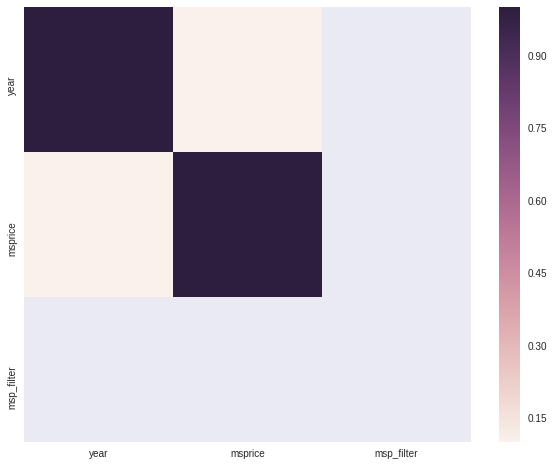

In [0]:
f, ax = plt.subplots(figsize=(10, 8))
corr = dataset_A.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

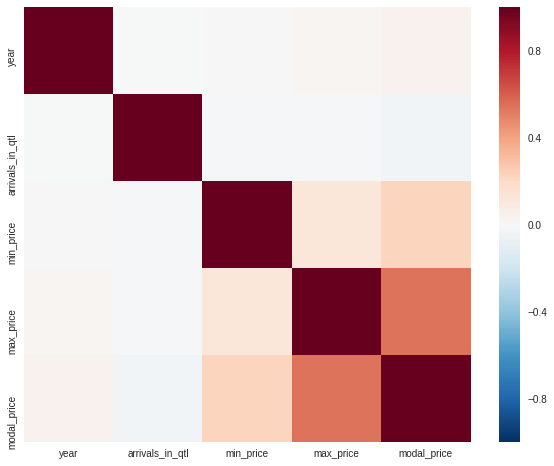

In [0]:
f, ax = plt.subplots(figsize=(10, 8))
corr = dataset_B.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

## Trend Analysis

Time series data can be represented in the following three forms:

1. **Trends**  ie is the consistent upwards or downwards slope of a time series.

2. **Seasonality** ie is  periodic pattern of a time series.

3. **Noise**  ie is Outliers or missing values

We have already dealt with outliers and missing values so now let us look at seasonality and trends in our dataset.

## Checking stationarity of data

In [0]:

#Calculating Rolling mean averages
rollmean=dataset_B.rolling(window=12).mean()
rollstd=dataset_B.rolling(window=12).std()
print(rollmean,rollstd)


Text(0.5, 1.0, 'Rolling Standard Deviation')

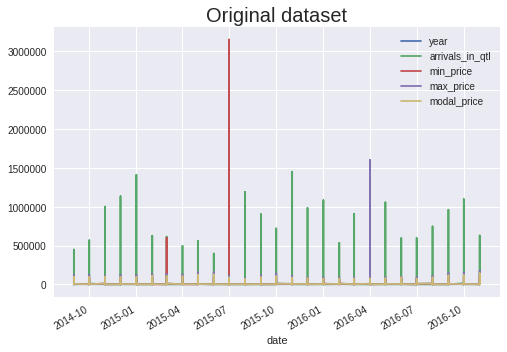

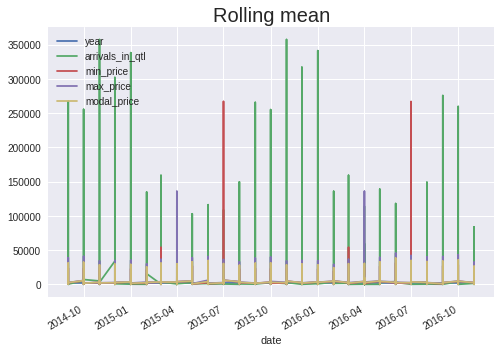

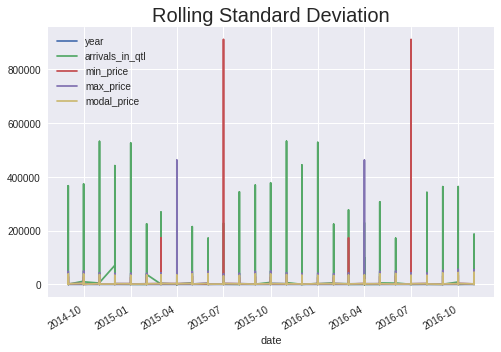

In [0]:
#Plotting rolling statistics
dataset_B.plot()
plt.title("Original dataset",fontsize=20)
rollmean.plot()
plt.title("Rolling mean",fontsize=20)
rollstd.plot()
plt.title("Rolling Standard Deviation",fontsize=20)



In [0]:
#Checking stationarity of data
#Calculating Rolling mean averages
rollmeanA=dataset_A.rolling(window=12).mean()
rollstdA=dataset_A.rolling(window=12).std()
print(rollmeanA,rollstdA)

Text(0.5, 1.0, 'Rolling Standard Deviation')

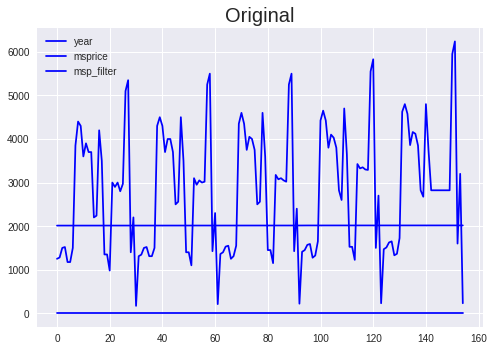

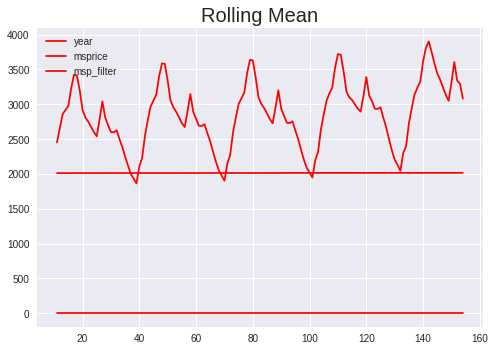

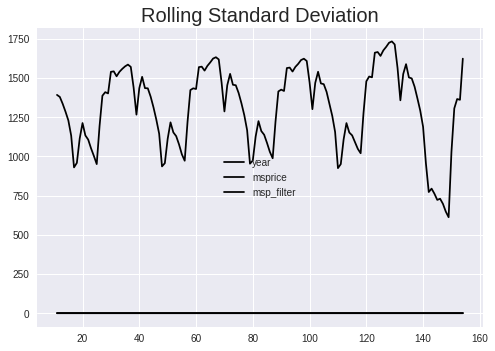

In [0]:
orig=dataset_A.plot(color='blue')
plt.title('Original',fontsize=20)
Rm=rollmeanA.plot(color='red')
plt.title('Rolling Mean',fontsize=20)
Rstd=rollstdA.plot(color='black')
plt.title('Rolling Standard Deviation',fontsize=20)

## Understanding Price Fluctuations

In [0]:
dataset_B["cluster"]=dataset_B["APMC"]+":"+dataset_B["commodity"]
dataset_B.head()

,APMC,commodity,year,month,arrivals_in_qtl,min_price,max_price,modal_price,district_name,state_name,cluster
date,,,,,,,,,,,
2015-04-01,Ahmednagar,bajri,2015,April,79,1406,1538,1463,Ahmadnagar,Maharashtra,Ahmednagar:bajri
2016-04-01,Ahmednagar,bajri,2016,April,106,1788,1925,1875,Ahmadnagar,Maharashtra,Ahmednagar:bajri
2015-04-01,Ahmednagar,wheathusked,2015,April,1253,1572,1890,1731,Ahmadnagar,Maharashtra,Ahmednagar:wheathusked
2016-04-01,Ahmednagar,wheathusked,2016,April,387,1750,2220,1999,Ahmadnagar,Maharashtra,Ahmednagar:wheathusked
2015-04-01,Ahmednagar,sorgumjawar,2015,April,3825,1600,2200,1900,Ahmadnagar,Maharashtra,Ahmednagar:sorgumjawar


In [0]:
data=dataset_B[["APMC","commodity","modal_price","year","cluster"]].groupby(["APMC","commodity","year","cluster"],as_index=False).count().rename(columns={"modal_price":"count"}).reset_index(drop=True)
data.head()

,APMC,commodity,year,cluster,count
0,Aamgaon,paddyunhusked,2014,Aamgaon:paddyunhusked,4
1,Aamgaon,paddyunhusked,2015,Aamgaon:paddyunhusked,12
2,Aamgaon,paddyunhusked,2016,Aamgaon:paddyunhusked,11
3,Aarni,black gram,2015,Aarni:black gram,1
4,Aarni,black gram,2016,Aarni:black gram,2


In [0]:
filtered=data["cluster"].unique().tolist()
dataset_B_filter=dataset_B[dataset_B["cluster"].isin(filtered)].reset_index(drop=True)
dataset_B_filter.to_csv("Seasonal_data_analysis.csv",index=False)

## Seasonal Patterns

In addition to a trend there may also be cyclic or seasonal variations in our data. Time series can contain trends which may be either linear or exponential or mixed. Smoothning on this data will be required to predict the values for any kind of forecasting. There can be multiple models of seasonality.

1.   Additive Seasonality : Here the different components affect the time series additively . The amplitude of the seasonal effect will be same each year. Residual are random components that add on to other components of the series. **Data= Seasonal effect+ Trend+ Cyclical + Residual**
             
       
2.   Multiplicative Seasonality: In time series involving quantities  the differences in the values are given less importance and percentage changes are given prominence.**Data= Seasonal effect * Trend * Cyclical * Residual**


### Detecting Seasonality Type

Text(0.5, 1.0, 'LogScale Plot of msprice')

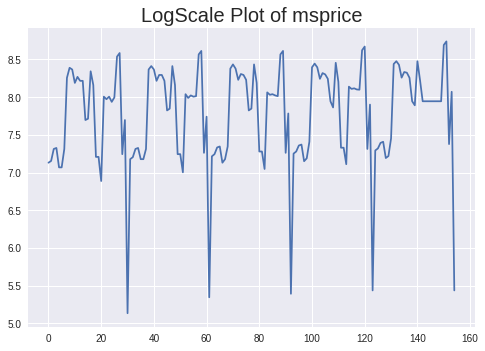

In [0]:
dataset_logScale=np.log(dataset_A['msprice'])
plt.plot(dataset_logScale)
plt.title('LogScale Plot of msprice',fontsize=20)

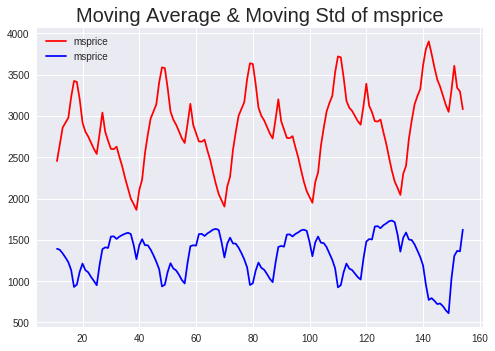

In [0]:
moving_avg=dataset_A.msprice.rolling(window=12).mean()
moving_std=dataset_A.msprice.rolling(window=12).std()
ma=plt.plot(moving_avg,color='red')
mstd=plt.plot(moving_std,color='blue')
plt.title('Moving Average & Moving Std of msprice',fontsize=20)
plt.legend(loc='best')
plt.show(block=False)

Text(0.5, 1.0, 'Plot after division with moving average of msprice')

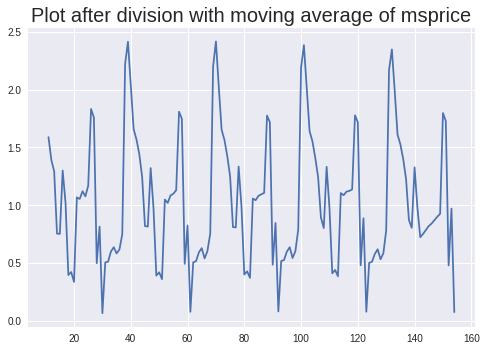

In [0]:
plt.plot(dataset_A['msprice']/moving_avg)
plt.title('Plot after division with moving average of msprice',fontsize=20)


From the above visualizations we determine that the seasonality type for **msprice** in CMO_MSP_Mandi data is of **multiplicative type**.

## Seasonality Adjustment / Deseasonalize the trends 
 Identifying and removing the seasonal component from the time series can result in a clearer relationship between input and output variables. Additional information about the seasonal component of the time series can provide new information to improve analysis 's efficiency.'
 
 A simple way to correct for a seasonal component is to use differencing.
If there is a seasonal component at the level of one week, then we can remove it on an observation today by subtracting the value from last week.

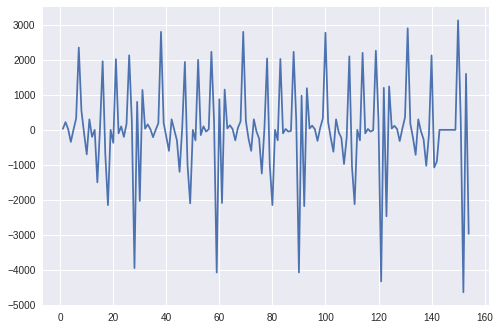

In [0]:
dataset_A['msprice'].diff().plot()

## **Comparing APMC Price data with Min Support Price**

In [0]:
dataset_B.groupby(['APMC']).corr()

arrivals_in_qtl  max_price  min_price  \
APMC                                                                   
Aamgaon       arrivals_in_qtl         1.000000  -0.313400  -0.342462   
              max_price              -0.313400   1.000000   0.941413   
              min_price              -0.342462   0.941413   1.000000   
              modal_price            -0.319762   0.991896   0.969431   
              year                   -0.212362   0.038387   0.137034   
Aarni         arrivals_in_qtl         1.000000   0.122017   0.105121   
              max_price               0.122017   1.000000   0.994177   
              min_price               0.105121   0.994177   1.000000   
              modal_price             0.116580   0.999096   0.997287   
              year                    0.052155   0.361397   0.343082   
Achalpur      arrivals_in_qtl         1.000000   0.058376   0.042816   
              max_price               0.058376   1.000000   0.991585   
              min_price               0.042816   0.991585   1.000000   
              modal_price             0.052066   0.998379   0.996922   
              year                    0.299422   0.019635   0.011805   
Aheri         arrivals_in_qtl         1.000000  -0.128404  -0.127916   
              max_price              -0.128404   1.000000   0.995992   
              min_price              -0.127916   0.995992   1.000000   
              modal_price            -0.128344   0.999120   0.998633   
              year                   -0.139623   0.194502   0.208648   
Ahmednagar    arrivals_in_qtl         1.000000  -0.105974  -0.153328   
              max_price              -0.105974   1.000000   0.893301   
              min_price              -0.153328   0.893301   1.000000   
              modal_price            -0.122614   0.978932   0.959329   
              year                   -0.019391   0.045064  -0.019975   
Ahmedpur      arrivals_in_qtl         1.000000  -0.049963  -0.065784   
              max_price              -0.049963   1.000000   0.991131   
              min_price              -0.065784   0.991131   1.000000   
              modal_price            -0.058517   0.997138   0.995916   
              year                    0.022187  -0.001151   0.014643   
...                                        ...        ...        ...   
Washim        arrivals_in_qtl         1.000000   0.012848   0.003062   
              max_price               0.012848   1.000000   0.994020   
              min_price               0.003062   0.994020   1.000000   
              modal_price             0.005889   0.997591   0.998093   
              year                    0.009943   0.253217   0.244882   
Washim-Ansing arrivals_in_qtl         1.000000  -0.074438  -0.088478   
              max_price              -0.074438   1.000000   0.999134   
              min_price              -0.088478   0.999134   1.000000   
              modal_price            -0.081483   0.999815   0.999598   
              year                         NaN        NaN        NaN   
Yawal         arrivals_in_qtl         1.000000  -0.347230  -0.371914   
              max_price              -0.347230   1.000000   0.988267   
              min_price              -0.371914   0.988267   1.000000   
              modal_price            -0.361166   0.995399   0.996487   
              year                   -0.095444   0.119483   0.095535   
Yeola         arrivals_in_qtl         1.000000  -0.258454  -0.351555   
              max_price              -0.258454   1.000000   0.969384   
              min_price              -0.351555   0.969384   1.000000   
              modal_price            -0.278578   0.996401   0.983047   
              year                    0.002557   0.025927   0.043509   
Yeotmal       arrivals_in_qtl         1.000000  -0.020481  -0.048625   
              max_price              -0.020481   1.000000   0.990371   
              min_price              -0.048625   0.990371   1.000000   

In [0]:
dataset_A.groupby(['commodity']).corr()

msp_filter   msprice      year
commodity                                                     
bajri               msp_filter         NaN       NaN       NaN
                    msprice            NaN  1.000000  0.718970
                    year               NaN  0.718970  1.000000
barli               msp_filter         NaN       NaN       NaN
                    msprice            NaN  1.000000  0.783013
                    year               NaN  0.783013  1.000000
coconut             msp_filter         NaN       NaN       NaN
                    msprice            NaN  1.000000  0.918400
                    year               NaN  0.918400  1.000000
copra ballyellow    msp_filter         NaN       NaN       NaN
                    msprice            NaN  1.000000  0.934580
                    year               NaN  0.934580  1.000000
copra millingyellow msp_filter         NaN       NaN       NaN
                    msprice            NaN  1.000000  0.934539
                    year               NaN  0.934539  1.000000
cotton              msp_filter         NaN       NaN       NaN
                    msprice            NaN  1.000000  0.989250
                    year               NaN  0.989250  1.000000
cottonlong staple   msp_filter         NaN       NaN       NaN
                    msprice            NaN  1.000000  0.989250
                    year               NaN  0.989250  1.000000
gramyellow          msp_filter         NaN       NaN       NaN
                    msprice            NaN  1.000000 -0.021384
                    year               NaN -0.021384  1.000000
grnut kernels       msp_filter         NaN       NaN       NaN
                    msprice            NaN  1.000000  0.866541
                    year               NaN  0.866541  1.000000
jowarhybrid         msp_filter         NaN       NaN       NaN
                    msprice            NaN  1.000000  0.951943
                    year               NaN  0.951943  1.000000
...                                    ...       ...       ...
sorgumjawar         msp_filter         NaN       NaN       NaN
                    msprice            NaN  1.000000  0.947900
                    year               NaN  0.947900  1.000000
soyabean            msp_filter         NaN       NaN       NaN
                    msprice            NaN  1.000000  0.860715
                    year               NaN  0.860715  1.000000
soyabeanblack       msp_filter         NaN       NaN       NaN
                    msprice            NaN  1.000000  0.946600
                    year               NaN  0.946600  1.000000
spilt gerrn gram    msp_filter         NaN       NaN       NaN
                    msprice            NaN  1.000000  0.990443
                    year               NaN  0.990443  1.000000
split black gram    msp_filter         NaN       NaN       NaN
                    msprice            NaN  1.000000  0.925005
                    year               NaN  0.925005  1.000000
sugarcane           msp_filter         NaN       NaN       NaN
                    msprice            NaN  1.000000  0.889001
                    year               NaN  0.889001  1.000000
sunflower           msp_filter         NaN       NaN       NaN
                    msprice            NaN  1.000000  0.970143
                    year               NaN  0.970143  1.000000
toriayellow         msp_filter         NaN       NaN       NaN
                    msprice            NaN  1.000000 -0.023478
                    year               NaN -0.023478  1.000000
wheathusked         msp_filter         NaN       NaN       NaN
                    msprice            NaN  1.000000  0.775993
                    year               NaN  0.775993  1.000000
wheatunhusked       msp_filter         NaN       NaN       NaN
                    msprice            NaN  1.000000  0.775993
                    year               NaN  0.775993  1.000000

[93 rows x 3 columns]

## Determining relation between Price variations & Arrival Quantity

Text(0.5, 1.0, 'Relation between msprice and Modal_price')

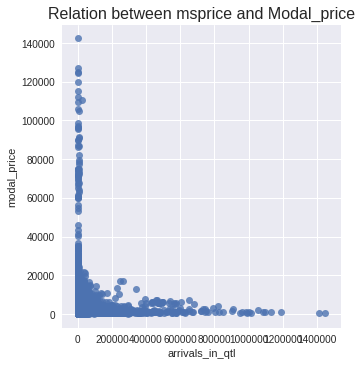

In [0]:
sns.lmplot(x='arrivals_in_qtl',y='modal_price',fit_reg=False,data=dataset_B)
plt.title('Relation between arrivals_in_qtl and Modal_price',fontsize=16)


## Plotting autocorrelation function of msprice

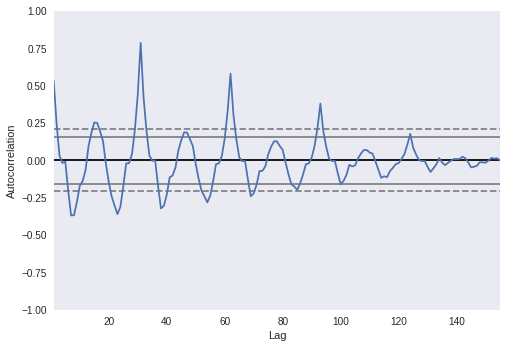

In [0]:
pd.plotting.autocorrelation_plot(dataset_A['msprice'])

## Flagging Highest Price Fluctuation Data Points

In [0]:
from scipy import stats
def price_commodities(dataset_B): 
    data=[]
    commodities=dataset_B["cluster"].unique().tolist()
    for commodity in commodities:
        dataset_B_temp=dataset_B[dataset_B["cluster"]==commodity]
        value=stats.variation(dataset_B_temp["max_price"])
        data.append((commodity,value))
    data.sort(key=lambda x: x[1],reverse= True)
    #top 20 APMC commodities cluster name
    data=[x[0] for x in data[:20]] 
    return data

In [0]:
fluctuation=price_commodities(dataset_B)
print(fluctuation)

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:999: RuntimeWarning: invalid value encountered in double_scalars
  return a.std(axis) / a.mean(axis)


['Ratanagari:coriander  ', 'Pune:shepu', 'Ramtek:mosambi', 'Tadkalas:sorgumjawar', 'Tadkalas:wheathusked', 'Tadkalas:gram', 'Tadkalas:green gram', 'Tadkalas:pigeon pea tur', 'Akluj:lemon', 'Akluj:coriander  ', 'Pune-Pimpri:shepu', 'Karad:math bhaji', 'Ulhasnagar:coconut', 'Vadgaon Peth:coriander  ', 'Barshi:shevga', 'Chandrapur:pineapple', 'Karad:coriander  ', 'Kolhapur:raddish', 'Barshi:chikoo', 'Barshi:brinjal']
